In [16]:
import os
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('C:/Users/annie/Documents/TA Stats I')

In [7]:
# read the data
data = pd.read_csv('assignment1.csv')
# set seed
np.random.seed(0)
data.head()

,Property_Address,Tax_Year,Property_Class,Type_of_Residence,Rooms,Bedrooms,Basement,Fireplaces,Central_Air,Full_Baths,Half_Baths,Building_Square_Feet,Land_Square_Feet,Age,Longitude,Latitude,Sale_Price
0,510 WOODLAND AVE,2014,206,2-story,8.0,4.0,Partial basement,2.0,Yes,4.0,1.0,3754.0,72745.0,74.0,-87.916530,41.792005,1795000
1,205 COMM DR,2011,204,1-story,8.0,4.0,Full basement,3.0,Yes,1.0,1.0,2323.0,13221.0,65.0,-87.861726,41.834753,275000
2,74489 W WASHINGTON 401,2006,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.809089,41.881484,149500
3,515 GRANT ST ROSELLE,2018,278,2.0,8.0,4.0,1.0,1.0,1.0,2.0,1.0,2857.0,11039.0,18.0,-88.088388,41.992657,440000
4,10360 S ROBERTS RD,2006,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.817899,41.702436,235000


#### Correlation Plots

The default correlation algorithm for pandas is the **pearson pairwise correlation**.  Also, the algorithm is smart and automatically ignores missing or NaN data, which would have caused an error.

Pearson correlation coefficients ranges between 1 and -1, where 1 means the two features are maximally positively correlated, 1 means there is no correlation, and -1 means the two features are maximally negatively correlated.

$Corr_{Pearson} = {Covariance(x, y) \over {\sigma^2_{x} \sigma^2_{y}} }$

where 

$Covariance(x, y) = {\sum(x_{i} - \bar{x})\sum(y_{i} - \bar{y}) \over {n}}$

In [69]:
corrmat

,Tax_Year,Property_Class,Rooms,Bedrooms,Fireplaces,Full_Baths,Half_Baths,Building_Square_Feet,Land_Square_Feet,Age,Longitude,Latitude,Sale_Price
Tax_Year,1.000000,0.143437,-0.002431,-0.013122,0.223094,-0.055366,0.240546,0.101590,0.220146,-0.344699,-0.536521,0.627658,0.054429
Property_Class,0.143437,1.000000,0.033943,-0.008233,0.217078,-0.073131,0.303184,0.158205,0.388593,-0.647040,-0.098759,0.198155,-0.053038
Rooms,-0.002431,0.033943,1.000000,0.867731,0.132501,0.723623,0.084681,0.764770,0.071617,0.096617,0.049816,0.101273,0.307514
Bedrooms,-0.013122,-0.008233,0.867731,1.000000,0.120913,0.722927,0.084738,0.754960,0.064560,0.128454,0.065920,0.099114,0.285783
Fireplaces,0.223094,0.217078,0.132501,0.120913,1.000000,0.328474,0.337575,0.396677,0.274105,-0.253388,-0.138107,0.181468,0.466355
Full_Baths,-0.055366,-0.073131,0.723623,0.722927,0.328474,1.000000,0.100257,0.805231,-0.146938,0.096662,0.094475,0.041793,0.478313
Half_Baths,0.240546,0.303184,0.084681,0.084738,0.337575,0.100257,1.000000,0.259872,0.137367,-0.341392,-0.201756,0.150884,0.237453
Building_Square_Feet,0.101590,0.158205,0.764770,0.754960,0.396677,0.805231,0.259872,1.000000,0.216422,-0.079967,-0.024090,0.185416,0.544026
Land_Square_Feet,0.220146,0.388593,0.071617,0.064560,0.274105,-0.146938,0.137367,0.216422,1.000000,-0.297559,-0.319423,0.201367,-0.102085
Age,-0.344699,-0.647040,0.096617,0.128454,-0.253388,0.096662,-0.341392,-0.079967,-0.297559,1.000000,0.394262,-0.124890,0.075178


References: https://benalexkeen.com/correlation-in-python/

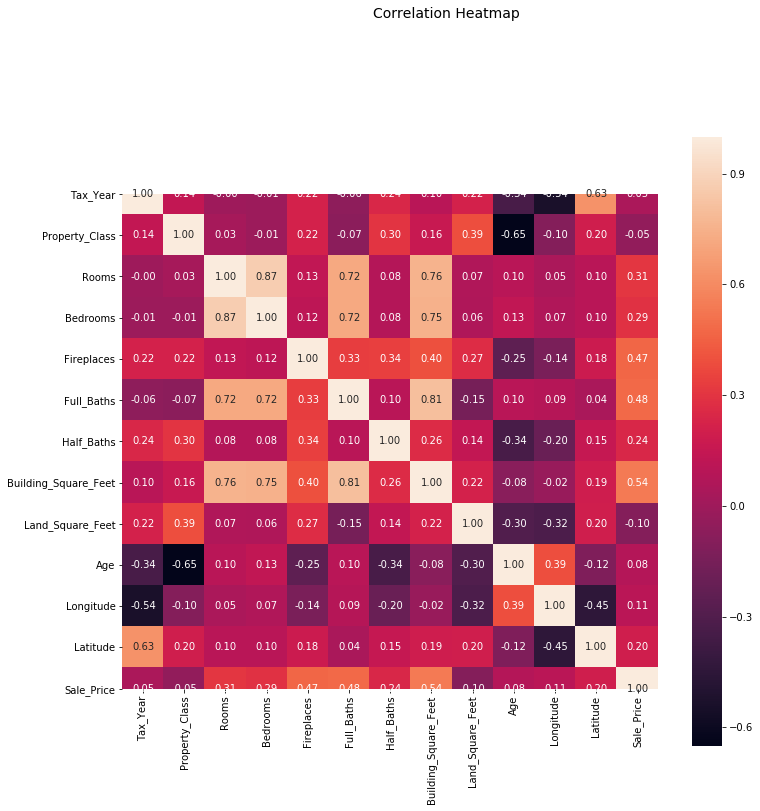

In [71]:
#correlation matrix

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(round(corrmat,2), annot=True, ax=ax, square=True,fmt='.2f');
f.subplots_adjust(top=0.83)
t= f.suptitle('Correlation Heatmap', fontsize=14)

Some take-aways:

Look at the 'SalePrice' column to get a feel for what it is highly correlated with: building_Square_Feet pops out
Looks like Rooms and Bedrooms are highly correlated. Makes sense, consider removing one (depending on final model architecture)
Lots of variables seem only mildly correlated with SalePrice

#### Skewness Plots

We previously looked at SalePrice, but usually you will want to spend more time looking and understanding your features. For models like linear regression to work best, these should be close to gaussian as well. We won't spend much time on this, but let's look to see what is heavily skewed.

Number of skewed features: 8

['Rooms' 'Bedrooms' 'Fireplaces' 'Full_Baths' 'Half_Baths'
 'Building_Square_Feet' 'Land_Square_Feet' 'Sale_Price']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1B6994788>,
      dtype=object)

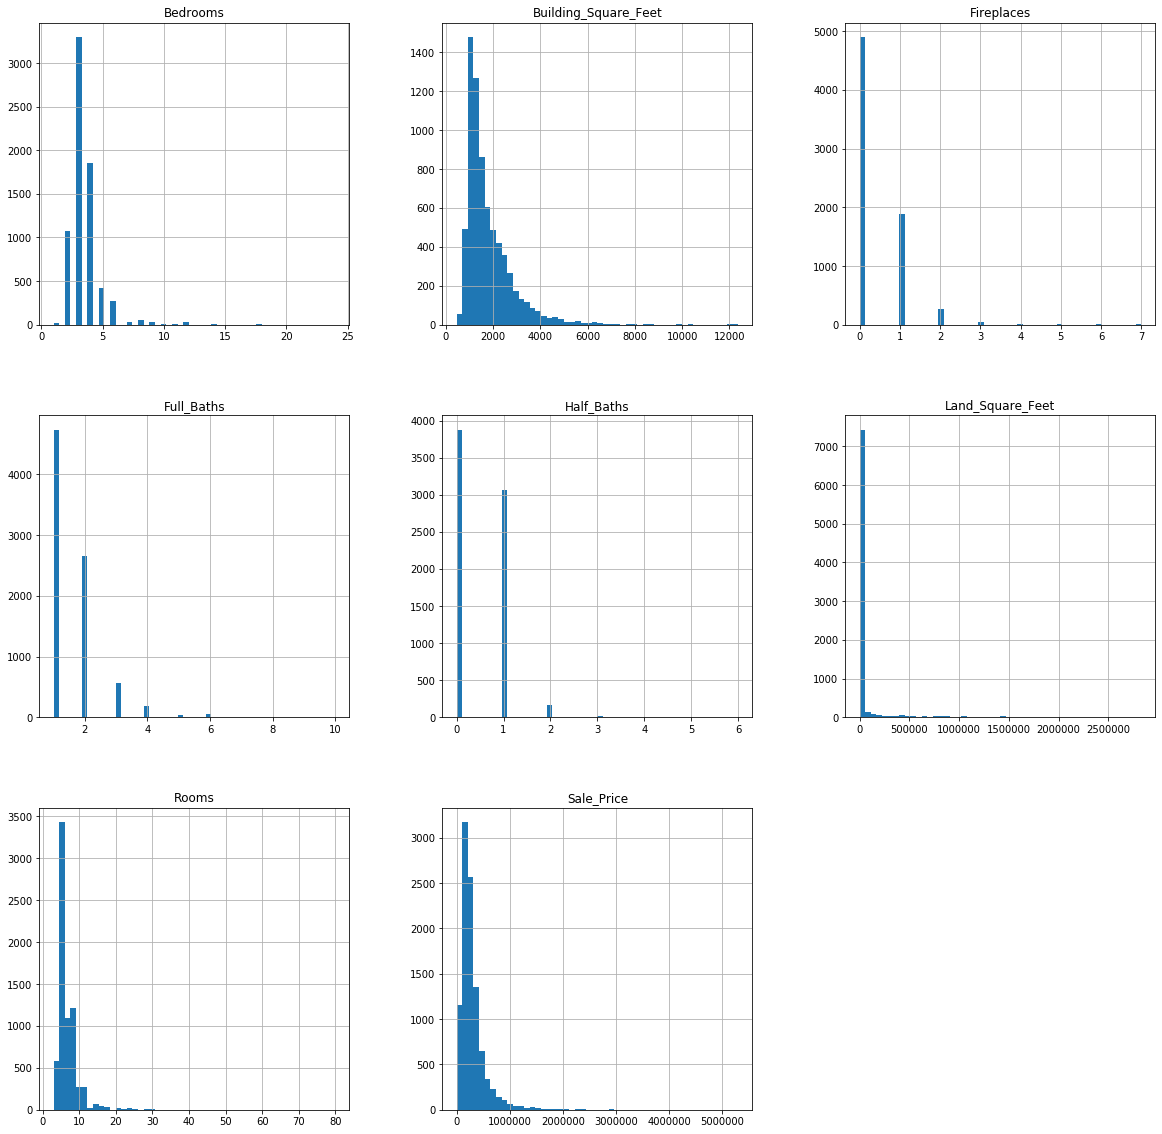

In [52]:
numeric = data.dtypes[data.dtypes != "object"].index

# Compute the skewness for non-categorical features
# Save the index for those highly skewed
skewed = data[numeric].apply(lambda x: skew(x.dropna())) 
skewed = skewed[skewed > 0.75]
skewed = skewed.index

print("Number of skewed features:" ,len(data[skewed].columns.values))
print()
print(data[skewed].columns.values)

data[data[skewed].columns.values].hist(bins=50, figsize=(20,20))


### Boxplots

Text(0, 0.5, 'Sale Price')

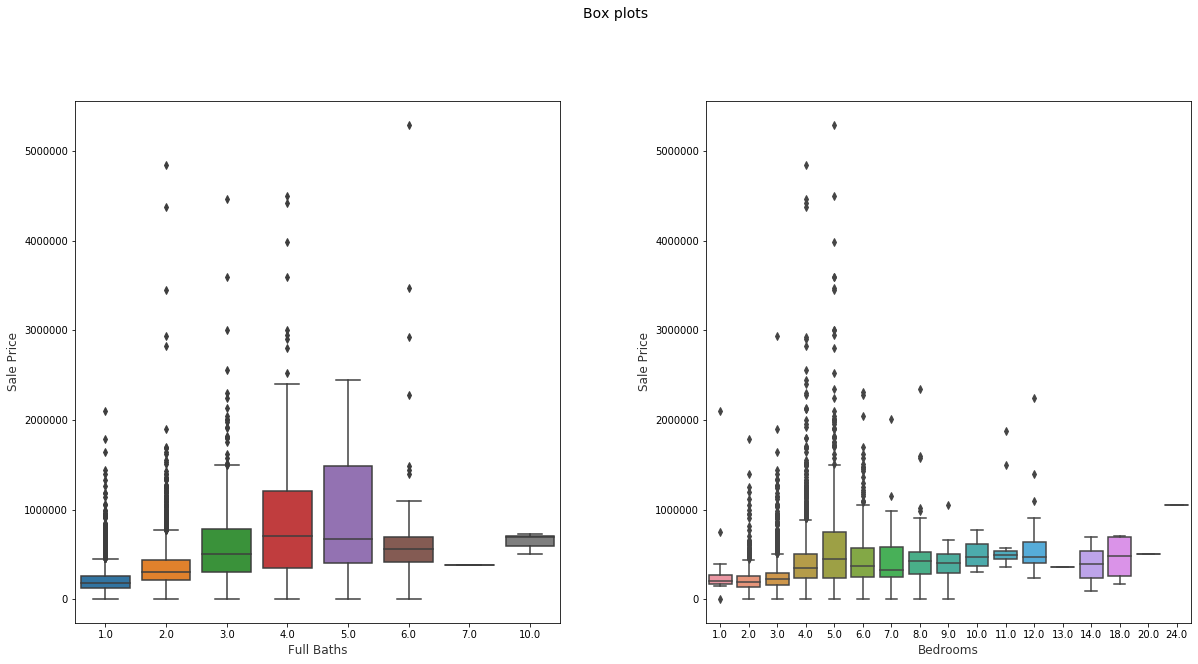

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
f.suptitle('Box plots', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="Full_Baths", y="Sale_Price",
            data=data,ax=ax1)
ax1.set_xlabel("Full Baths",size = 12,alpha=0.8)
ax1.set_ylabel("Sale Price",size = 12,alpha=0.8)

sns.boxplot(x="Bedrooms", y="Sale_Price", data=data, ax=ax2)
ax2.set_xlabel("Bedrooms",size = 12,alpha=0.8)
ax2.set_ylabel("Sale Price",size = 12,alpha=0.8)

### Multi-variate Analysis

Pairwise Plots

Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

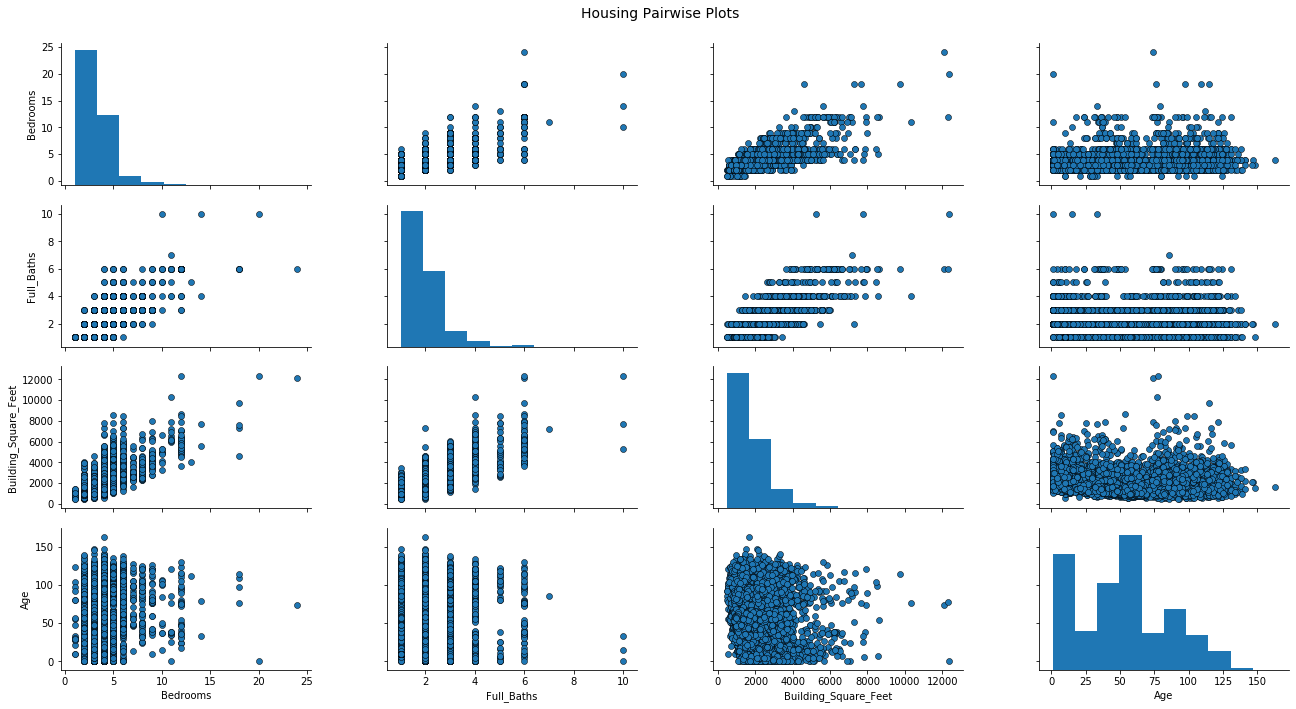

In [60]:
cols = ['Bedrooms','Full_Baths','Building_Square_Feet','Age']
pp = sns.pairplot(data[cols],  aspect=1.8, 
                  palette=sns.light_palette('red', 3),
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Housing Pairwise Plots', fontsize=14)

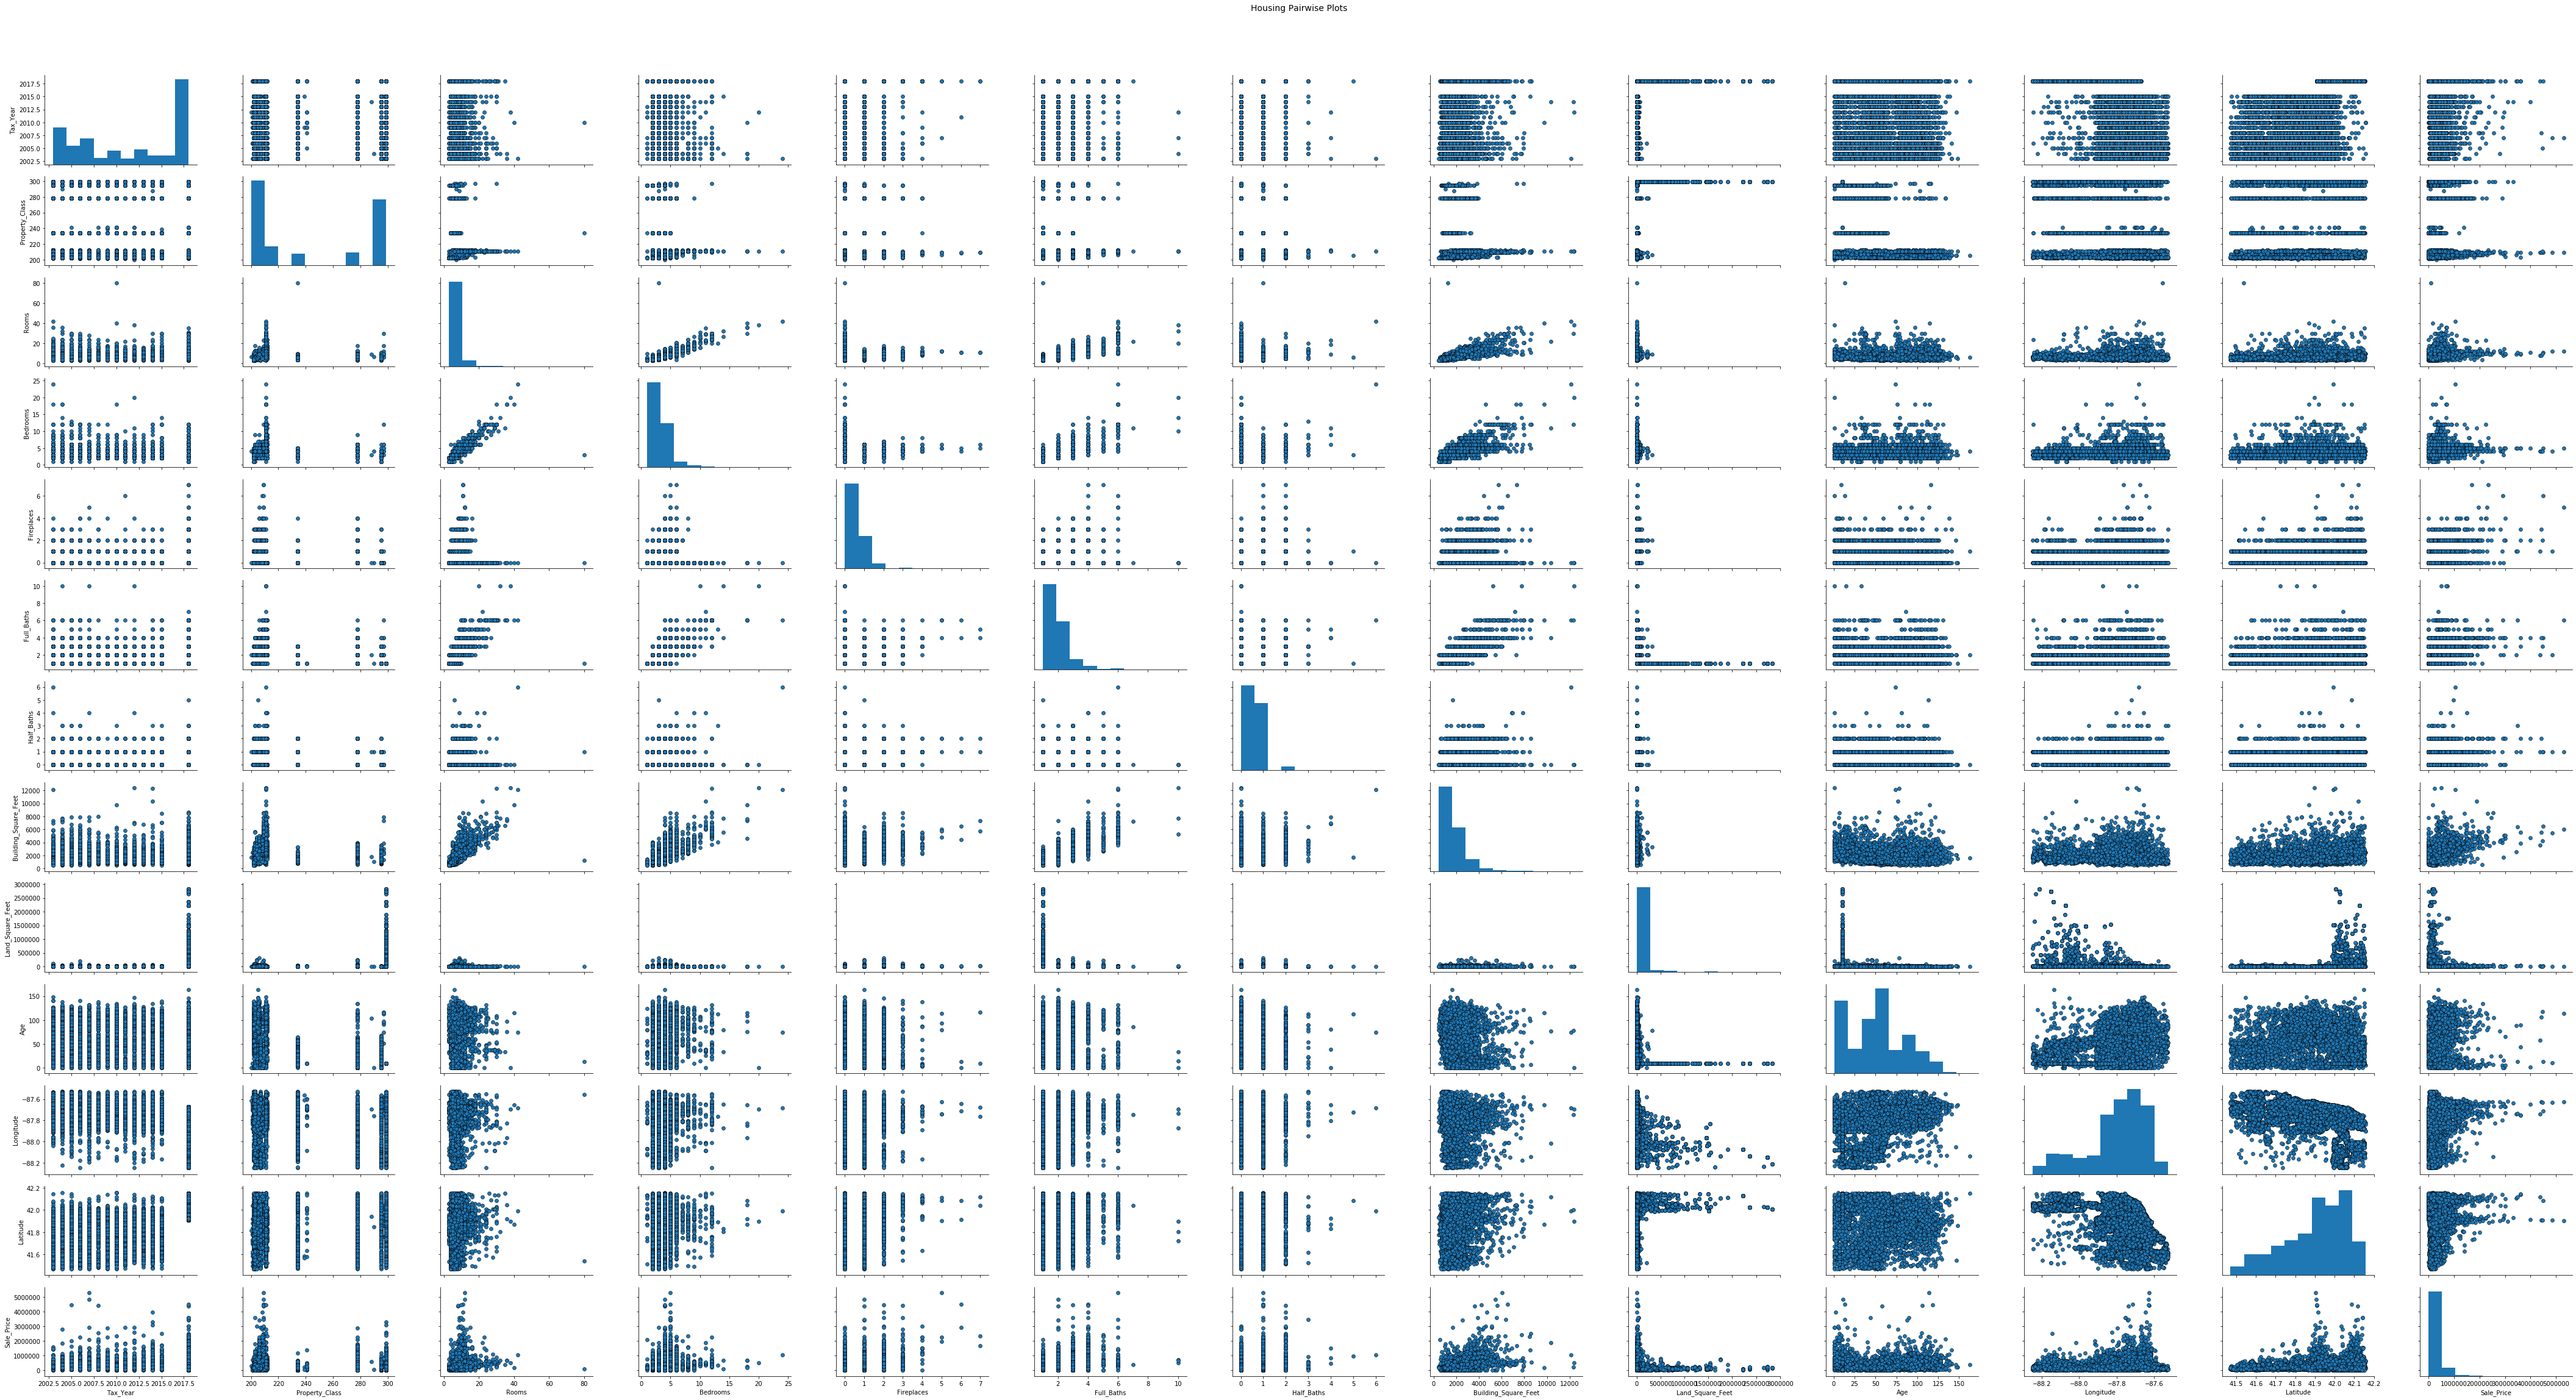

In [58]:
pp = sns.pairplot(data,  aspect=1.8, 
                  palette=sns.light_palette('red', 3),
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Housing Pairwise Plots', fontsize=14)